## Portfolio optimization

In [1]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>



Fund allocation for ['SPY', 'AMZN', 'FB', 'AXY', 'GWPH'] [0.2, 0.2, 0.2, 0.2, 0.2]




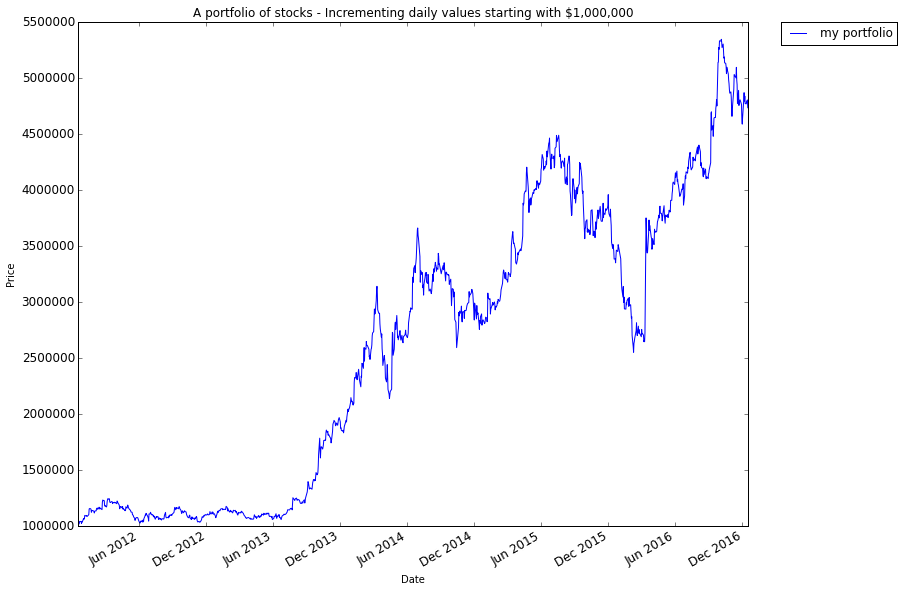

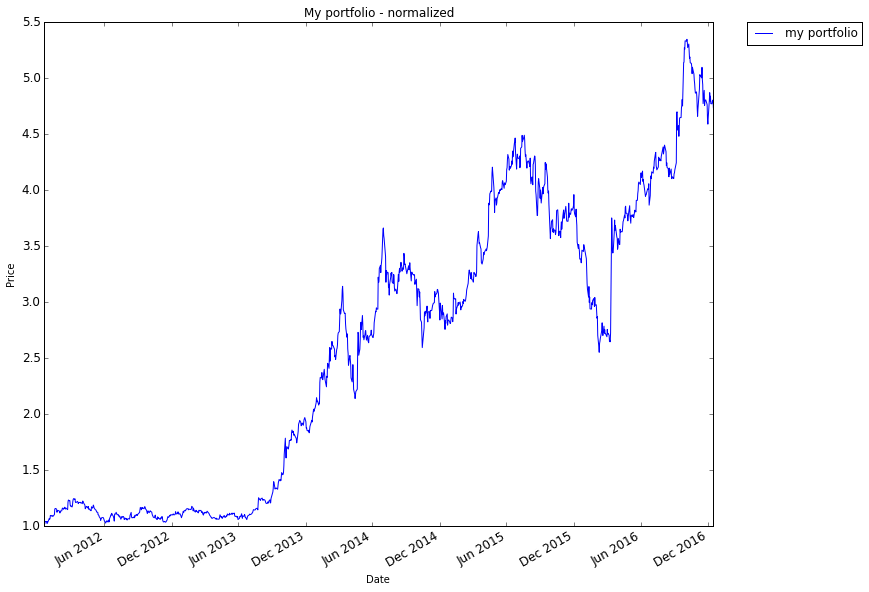

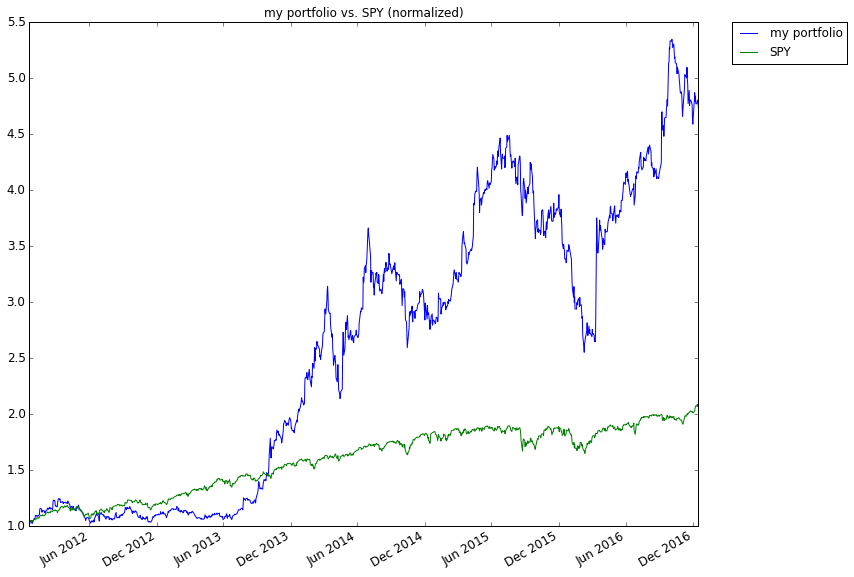

Fund allocation for ['SPY', 'AMZN', 'FB', 'AXY', 'GWPH'] [0.2, 0.2, 0.2, 0.2, 0.2]
Cumulative return:  3.73596393693
Average daily return:  0.00146562421112
Daily standard deviation:  0.0219439570454
Sharpe ratio:  1.06024920758




In [2]:
import os
import pandas as pd
import numpy as np
import scipy.optimize as spo
import matplotlib.pyplot as plt
%matplotlib inline 

def symbol_to_path(symbol, base_dir="data"):
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))


def get_data(symbols, dates):
    df = pd.DataFrame(index=dates)
    if 'SPY' not in symbols:  # add SPY for reference, if absent
        symbols.insert(0, 'SPY')

    for symbol in symbols:
        df_temp = pd.read_csv(symbol_to_path(symbol), index_col='Date',
                parse_dates=True, usecols=['Date', 'Adj Close'], na_values=['nan'])
        df_temp = df_temp.rename(columns={'Adj Close': symbol})
        df = df.join(df_temp)
        if symbol == 'SPY':  # drop dates SPY did not trade
            df = df.dropna(subset=["SPY"])

    return df
  
    
def normalize_data(df):
    return df/ df.ix[0,:]
    
    
def compute_daily_returns_portfolio(df):
    daily_returns = (df/df.shift(1)) - 1
    daily_returns.ix[0] = 0
    
    return daily_returns
 
    
# def function(allocs, prices, start_val = 1000000, rfr = 0.0, sf = 252.0):
def function(optimal_allocation, df):
    
    trading_days = 252
    # Sharpe_ratio = np.sqrt(trading_days) * (daily_returns_portfolio.mean()/daily_returns_portfolio.std())
    sharpe_ratio = 1.54262040364
    sharpe_ratio = sharpe_ratio * -1
    
    return sharpe_ratio

    
def run_portfolio_stats():
    
    dates = pd.date_range('2011-12-18', '2016-12-18') # Define a date range
    symbols = ['SPY', 'AMZN', 'FB', 'AXY', 'GWPH'] # Choose stock symbols to read
    df = get_data(symbols, dates) # Get stock data
    df.fillna(method="ffill", inplace="True") # Forward fill empty trade dates (for AXY)
    df.fillna(method="bfill", inplace="True") # backfill empty trade dates (for AXY)
    df_normalized = normalize_data(df) # Normalize stock prices
    allocation = [0.2,0.2,0.2,0.2,0.2] # starting allocation
    df_normalized_allocation = df_normalized * allocation # normalize
    
    # Reflect starting values for each stock
    starting_value = [1000000] # starting value of portfolio is $1,000,000
    df_normed_allocation_X_starting_value = df_normalized_allocation * starting_value # normalize portfolio
    daily_portfolio_values = df_normed_allocation_X_starting_value.sum(axis=1) # Calculate portfolio value by day
    
    # Plot portfolio values
    print "\n"
    print "Fund allocation for", symbols, allocation
    print "\n"
    ax = daily_portfolio_values.ix['2011-12-18':'2016-12-18'].plot(title="A portfolio of stocks - Incrementing daily values starting with $1,000,000",fontsize=12,figsize=(12,10), label="my portfolio")
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()
    
    
    portfolio_values_normalized = normalize_data(daily_portfolio_values) # Plot portfolio values - normalized
    
    # plot normalized data
    portfolio_values_normalized.ix['2011-12-18':'2016-12-18']
    ax = portfolio_values_normalized.plot(title="My portfolio - normalized",fontsize=12,figsize=(12,10), label="my portfolio")
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()
    
    # Plot "my portfolio" vs SPY
    portfolio_values_normalized.plot(title="my portfolio vs. SPY (normalized)",fontsize=12,figsize=(12,10), label="my portfolio")
    df_normalized['SPY'].plot(title="my portfolio vs. SPY (normalized)",fontsize=12,figsize=(12,10), label="SPY")
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()
    
    print "Fund allocation for", symbols, allocation
    daily_returns_portfolio = compute_daily_returns_portfolio(daily_portfolio_values) # Compute daily returns
    daily_returns_portfolio = daily_returns_portfolio[1:] # Remove first row "0" for portfolio calculations
    print "Cumulative return: ", (daily_portfolio_values[-1] / daily_portfolio_values[0]) - 1
    print "Average daily return: ", daily_returns_portfolio.mean()
    print "Daily standard deviation: ", daily_returns_portfolio.std()
    
    # Sharpe ratio
    trading_days = 252
    Sharpe_ratio = np.sqrt(trading_days) * (daily_returns_portfolio.mean()/daily_returns_portfolio.std())
    print "Sharpe ratio: ", Sharpe_ratio
    print "\n"
    
if __name__ == "__main__":
    run_portfolio_stats()